In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
from pprint import pprint
from config import g_key

# Resource File (CSV)
df = pd.read_csv("output_data/Top_497.csv")

In [61]:
df.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,224,"French, European"
1,1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese
3,3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
4,4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


In [65]:
#Creating Data Frame of Top100 Restaurants best value for money
#Calculate a new factor taking in account the Average cost for two and the user rating

factor = df["Average Cost for two"] / df["User Rating"]
df["factor"] = factor
df.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines,factor
0,0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,224,"French, European",30.612245
1,1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian,102.040816
2,2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese,89.795918
3,3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese",38.775510
4,4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen",8.163265


In [75]:
bestValue_df = df.sort_values("factor")                         

#Reset the index
new_index_ranked = bestValue_df.reset_index(drop=True)
new_index_ranked

#Select the top 100 restaurants
top_100_best_value = new_index_ranked.loc[new_index_ranked.index <100]
top_100_best_value.to_csv('output_data/Top_100_bestValue.csv')
top_100_best_value

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines,factor
0,321,16600545,Bossman Coffee,Mount Lawley,"3/669 Beaufort Street, Mount Lawley, Perth",Perth,-31.933771,115.872299,1,15,4.6,Excellent,297,105,Cafe Food,3.260870
1,20,16558689,Pasticceria Papa,Haberfield,"145 Ramsay Street, Haberfield, Sydney",Sydney,-33.880914,151.139729,1,20,4.7,Excellent,516,170,"Coffee and Tea, Italian, Cafe Food",4.255319
2,58,16568870,Lentil As Anything,Newtown,"391 King Street, Newtown, Sydney",Sydney,-33.899735,151.177852,1,20,4.6,Excellent,195,92,"Vegetarian, Vegan",4.347826
3,66,16560009,The Yeeros Shop,Marrickville,"431 Illawarra Road, Marrickville, Sydney",Sydney,-33.915698,151.150656,1,20,4.6,Excellent,147,55,Greek,4.347826
4,65,16561142,Out of the Blue,Coogee,"272 Clovelly Road, Clovelly, Sydney",Sydney,-33.912251,151.258298,1,20,4.6,Excellent,173,62,"Burger, Seafood, Fish and Chips",4.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,486,16588258,Cafe Troppo,"Whitmore Square, City Centre","42 Whitmore Square, Adelaide",Adelaide,-34.933199,138.594901,2,40,4.2,Very Good,299,111,"Coffee and Tea, Cafe Food",9.523810
96,485,16588799,Nordburger,"The Parade, Norwood","168 The Parade, Norwood",Adelaide,-34.921336,138.635344,2,40,4.2,Very Good,677,219,"American, Burger, Ice Cream",9.523810
97,27,16559994,Vina Vegan Restaurant,Newtown,"395 King Street, Newtown, Sydney",Sydney,-33.899740,151.177892,2,45,4.7,Excellent,155,62,"Vietnamese, Vegetarian, Vegan",9.574468
98,62,16560596,Pho Tau Bay,Cabramatta,"Shop 12, 117 John Street, Cabramatta, Sydney",Sydney,-33.894392,150.933849,2,45,4.6,Excellent,222,89,"Vietnamese, Pho",9.782609


In [76]:
#Where are located the top 100 restaurants (user rating - number of votes)

#Group df (5 cities) by City
group_city = top_100_best_value.groupby("City")
#Check the number of restaurants per city
city_df = pd.DataFrame(group_city["Restaurant_id"].count())

city_df

,Restaurant_id
City,
Adelaide,14
Brisbane,28
Melbourne,17
Perth,18
Sydney,23


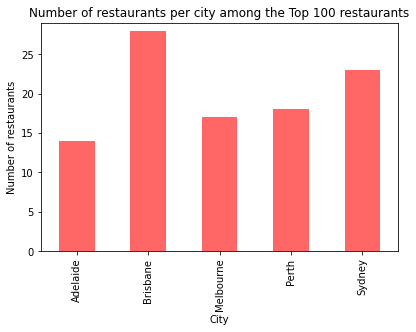

<Figure size 432x288 with 0 Axes>

In [73]:
#Plotting the top 100 restaurants with a bar graph
#Plotting the bar chart:
city_df.plot(kind="bar", facecolor="red", alpha=0.6, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Number of restaurants per city among the Top 100 restaurants")
plt.ylabel("Number of restaurants")
plt.xlim(-0.5,len(city_df)-0.5)
plt.ylim(0,max(city_df["Restaurant_id"])+1)
# Show plot
plt.show()
plt.tight_layout()

In [80]:
#Calculation of the average cost and user-rating per city
#Group df (5 cities) by City
group_city = top_100_best_value.groupby("City")
#Calculate the average cost for two per city
average_city = pd.DataFrame(group_city["Average Cost for two"].mean())

average_city

,Average Cost for two
City,
Adelaide,37.500000
Brisbane,35.642857
Melbourne,37.058824
Perth,35.277778
Sydney,34.347826


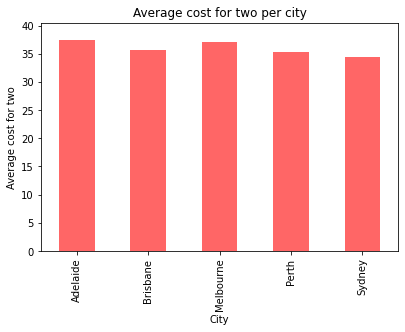

<Figure size 432x288 with 0 Axes>

In [82]:
#Plotting the average cost for two per city
average_city.plot(kind="bar", facecolor="red", alpha=0.6, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Average cost for two per city")
plt.ylabel("Average cost for two")
plt.xlim(-0.5,len(average_city)-0.5)
plt.ylim(0,max(average_city["Average Cost for two"])+3)
# Show plot
plt.show()
plt.tight_layout()

In [83]:
#Calculate the median of the average cost for two per city
median_city = pd.DataFrame(group_city["Average Cost for two"].median())
median_city

,Average Cost for two
City,
Adelaide,40
Brisbane,40
Melbourne,40
Perth,35
Sydney,35


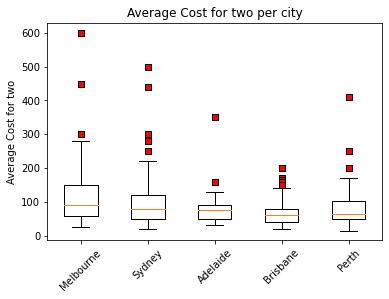

In [84]:
# Generate a box plot of the average cost for two across the five cities
Rest_Melbourne = df.loc[df["City"]=="Melbourne","Average Cost for two"]
Rest_Sydney = df.loc[df["City"]=="Sydney","Average Cost for two"]
Rest_Adelaide = df.loc[df["City"]=="Adelaide","Average Cost for two"]
Rest_Brisbane = df.loc[df["City"]=="Brisbane","Average Cost for two"]
Rest_Perth = df.loc[df["City"]=="Perth","Average Cost for two"]

data = [Rest_Melbourne,Rest_Sydney, Rest_Adelaide,Rest_Brisbane,Rest_Perth]
Cities = ["Melbourne", "Sydney", "Adelaide", "Brisbane", "Perth"]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title('Average Cost for two per city')
ax1.set_xticklabels(Cities, rotation=45, fontsize=10)
ax1.set_ylabel('Average Cost for two')
ax1.boxplot(data, flierprops=red_square)
plt.show()

In [85]:
#Calculate the average user rating per city
average_rating = pd.DataFrame(group_city["User Rating"].mean())
#Insert a column with average rating
average_rating

,User Rating
City,
Adelaide,4.371429
Brisbane,4.521429
Melbourne,4.676471
Perth,4.483333
Sydney,4.652174


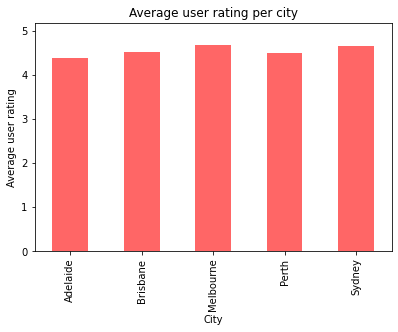

<Figure size 432x288 with 0 Axes>

In [86]:
#Plotting the average rating per city
average_rating.plot(kind="bar", facecolor="red", alpha=0.6, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Average user rating per city")
plt.ylabel("Average user rating")
plt.xlim(-0.5,len(average_rating)-0.5)
plt.ylim(0,max(average_rating["User Rating"])+0.5)
# Show plot
plt.show()
plt.tight_layout()

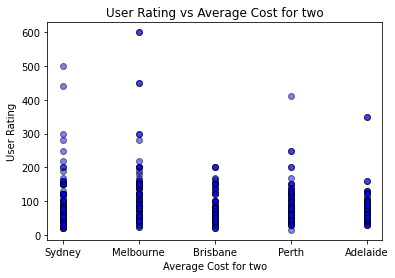

In [87]:
#Scatter plot of the average cost two and average rating
#Scatter plot Average cost for two vs User Rating
y = df["Average Cost for two"]
x = df["City"] 

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Average Cost for two')
plt.ylabel('User Rating')
plt.title('User Rating vs Average Cost for two')
#plt.savefig('images/User Rating vs. Average Cost.png')
plt.show()

In [88]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

#Creating a restaurant symbol map

# Using the template add the restaurant marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Name}</dd>
<dt>Cuisine</dt><dd>{Cuisines}</dd>
<dt>User rating</dt><dd>{Rating Text}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
restaurant_info = [info_box_template.format(**row) for index, row in df.iterrows()]
locations = df[["Latitude", "Longitude"]]

In [89]:
# Add marker layer ontop of heat map

# Create hotel layer
restaurant_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=5,
    info_box_content=restaurant_info
)
fig = gmaps.figure()
fig.add_layer(restaurant_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))